In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

import sys
sys.path.append("..")

### Load data

In [2]:
import sklearn
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

np.random.seed(0)
NUM_CLASSES = 2
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.4)

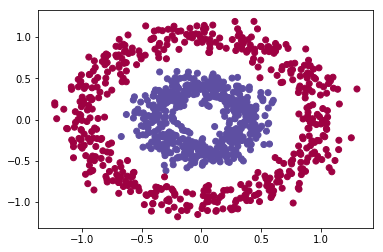

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

ohe = OneHotEncoder(categories=[range(NUM_CLASSES)])
Y_train = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
Y_test = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()

### Fit model

In [5]:
%autoreload

from src.model import DNN
from src.utils.layer import Layer
from src.utils import activations

dnn = DNN([
    Layer(7, activation=activations.ReLU),
    Layer(4, activation=activations.ReLU),
    Layer(NUM_CLASSES, activation=activations.softmax)
], 0.01, 10000)

costs = dnn.fit(X_train, Y_train)

### Accuracy

In [14]:
from sklearn.metrics import accuracy_score
decode = lambda x: np.argmax(x, axis=1)

y_train_pred = decode(dnn.predict(X_train))
print("Train:", accuracy_score(y_train, y_train_pred))
y_test_pred = decode(dnn.predict(X_test))
print("Test:", accuracy_score(y_test, y_test_pred))

Train: 0.9988888888888889
Test: 1.0


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[45,  0],
       [ 0, 55]])

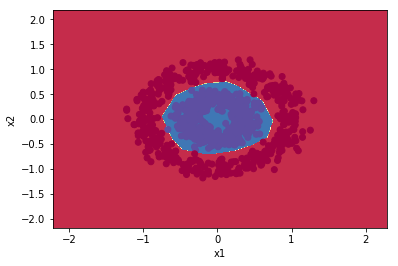

In [16]:
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    plt.show()
    
plot_decision_boundary(lambda x: decode(dnn.predict(x)), X_train, y_train)

### Cost

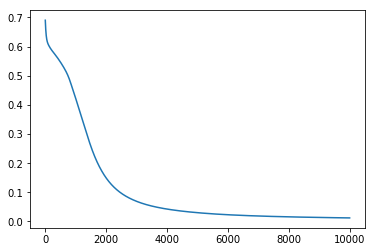

In [17]:
plt.plot(costs)
plt.show()

In [18]:
print("mean:   {0}".format(np.mean(costs)))
print("std:    {0}".format(np.std(costs)))
print("min:    {0}".format(np.min(costs)))
print("max:    {0}".format(np.max(costs)))
print("argmin: {0}".format(np.argmin(costs)))
print("argmax: {0}".format(np.argmax(costs)))

mean:   0.10895852339485228
std:    0.16465840226825473
min:    0.01215996949145934
max:    0.6903685755040614
argmin: 9999
argmax: 0
